In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG16, EfficientNetB0
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 5

train_dir = r"C:\\Users\\demen\\Forensics_Research\\DFFD_Dataset\\Train"
val_dir = r"C:\\Users\\demen\\Forensics_Research\\DFFD_Dataset\\Validation"
test_dir = r"C:\\Users\\demen\\Forensics_Research\\DFFD_Dataset\\Test"

In [3]:
print("Train_dir Subfolders: ", os.listdir(train_dir))
print("Valid_dir Subfolders: ", os.listdir(val_dir))
print("Test_dir Subfolders: ", os.listdir(test_dir))

Train_dir Subfolders:  ['fake', 'real']
Valid_dir Subfolders:  ['fake', 'real']
Test_dir Subfolders:  ['fake', 'real']


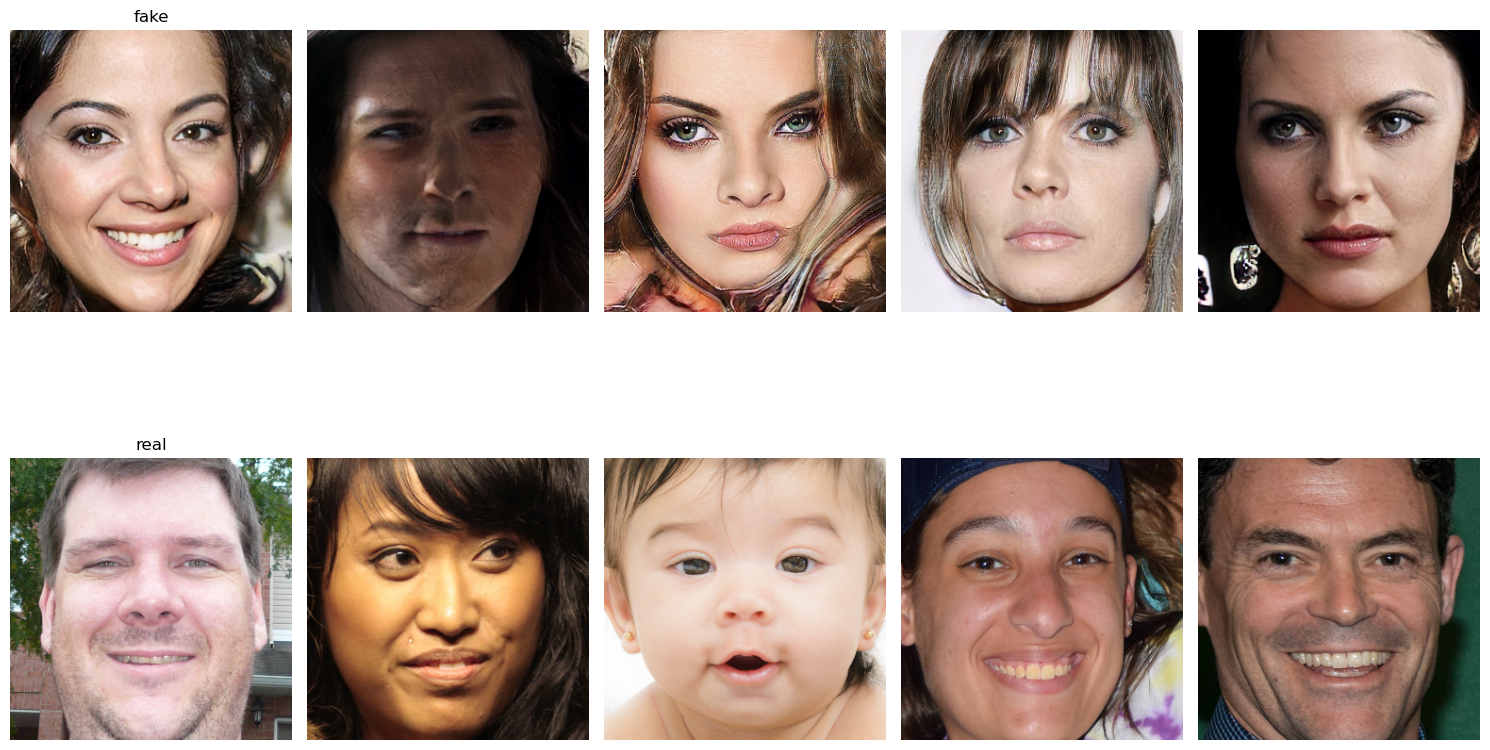

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
class_names = ['fake', 'real']
num_images = 5

plt.figure(figsize=(15, 10))

for i, class_name in enumerate(class_names):
    class_dir = os.path.join(test_dir, class_name)
    images = os.listdir(class_dir)
    plt.subplot(len(class_names), num_images, i * num_images + 1)
    plt.title(class_name)
    plt.axis('off')
    for j in range(num_images):
        img_path = os.path.join(class_dir, images[j])
        img = mpimg.imread(img_path)
        plt.subplot(len(class_names), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
datagen = ImageDataGenerator(rescale=1./255)
train_data = datagen.flow_from_directory(
    train_dir, 
    target_size=IMG_SIZE, 
    batch_size=BATCH_SIZE, 
    class_mode='binary')
val_data = datagen.flow_from_directory(
    val_dir, 
    target_size=IMG_SIZE, 
    batch_size=BATCH_SIZE, 
    class_mode='binary')
test_data = datagen.flow_from_directory(
    test_dir, 
    target_size=IMG_SIZE, 
    batch_size=BATCH_SIZE, 
    class_mode='binary', 
    shuffle=False)

Found 59956 images belonging to 2 classes.
Found 5997 images belonging to 2 classes.
Found 66860 images belonging to 2 classes.


In [6]:
def build_model(base_model_class, name):
    base = base_model_class(include_top=False, weights='imagenet', input_shape=(*IMG_SIZE, 3))
    base.trainable = False
    x = GlobalAveragePooling2D()(base.output)
    x = Dropout(0.5)(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base.input, outputs=output, name=name)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [7]:
models = {
    'ResNet50': ResNet50,
    'VGG16': VGG16,
    'EfficientNetB0': EfficientNetB0
}

histories = {}
for name, constructor in models.items():
    print(f"\nTraining {name}...")
    model = build_model(constructor, name)
    ckpt_path = f"{name}.h5"
    checkpoint = ModelCheckpoint(ckpt_path, save_best_only=True, monitor='val_accuracy', mode='max')
    history = model.fit(train_data, validation_data=val_data, epochs=EPOCHS, callbacks=[checkpoint])
    histories[name] = history


Training ResNet50...


D:\anacondapython\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 0s 722ms/step - accuracy: 0.8303 - loss: 0.4666

1874/1874 ━━━━━━━━━━━━━━━━━━━━ 1499s 796ms/step - accuracy: 0.8303 - loss: 0.4666 - val_accuracy: 0.8334 - val_loss: 0.4443
Epoch 2/5
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 1488s 794ms/step - accuracy: 0.8333 - loss: 0.4494 - val_accuracy: 0.8334 - val_loss: 0.4414
Epoch 3/5
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 1484s 792ms/step - accuracy: 0.8297 - loss: 0.4534 - val_accuracy: 0.8334 - val_loss: 0.4397
Epoch 4/5
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 1484s 792ms/step - accuracy: 0.8323 - loss: 0.4476 - val_accuracy: 0.8334 - val_loss: 0.4396
Epoch 5/5
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 1484s 792ms/step - accuracy: 0.8317 - loss: 0.4479 - val_accuracy: 0.8334 - val_loss: 0.4362

Training VGG16...
Epoch 1/5
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7992 - loss: 0.4769

1874/1874 ━━━━━━━━━━━━━━━━━━━━ 3502s 2s/step - accuracy: 0.7992 - loss: 0.4769 - val_accuracy: 0.8343 - val_loss: 0.3979
Epoch 2/5
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 3504s 2s/step - accuracy: 0.8329 - loss: 0.4052 - val_accuracy: 0.8341 - val_loss: 0.3875
Epoch 3/5
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 3493s 2s/step - accuracy: 0.8288 - loss: 0.4001 - val_accuracy: 0.8343 - val_loss: 0.3829
Epoch 4/5
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 3495s 2s/step - accuracy: 0.8301 - loss: 0.3958 - val_accuracy: 0.8336 - val_loss: 0.3791
Epoch 5/5
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 3497s 2s/step - accuracy: 0.8345 - loss: 0.3883 - val_accuracy: 0.8343 - val_loss: 0.3784

Training EfficientNetB0...
Epoch 1/5
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.8312 - loss: 0.4619

1874/1874 ━━━━━━━━━━━━━━━━━━━━ 740s 390ms/step - accuracy: 0.8312 - loss: 0.4619 - val_accuracy: 0.8334 - val_loss: 0.4534
Epoch 2/5
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 718s 383ms/step - accuracy: 0.8316 - loss: 0.4579 - val_accuracy: 0.8334 - val_loss: 0.4537
Epoch 3/5
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 723s 386ms/step - accuracy: 0.8326 - loss: 0.4572 - val_accuracy: 0.8334 - val_loss: 0.4565
Epoch 4/5
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 719s 383ms/step - accuracy: 0.8309 - loss: 0.4585 - val_accuracy: 0.8334 - val_loss: 0.4567
Epoch 5/5
1874/1874 ━━━━━━━━━━━━━━━━━━━━ 723s 386ms/step - accuracy: 0.8323 - loss: 0.4569 - val_accuracy: 0.8334 - val_loss: 0.4511


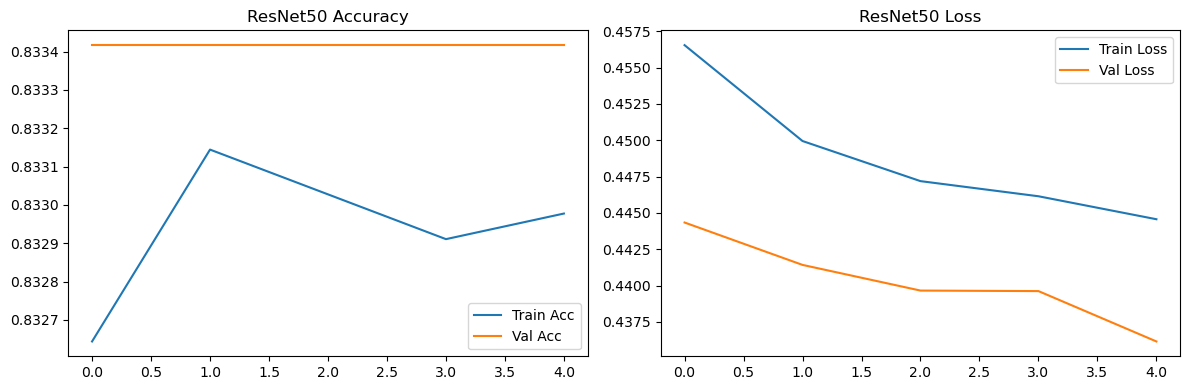

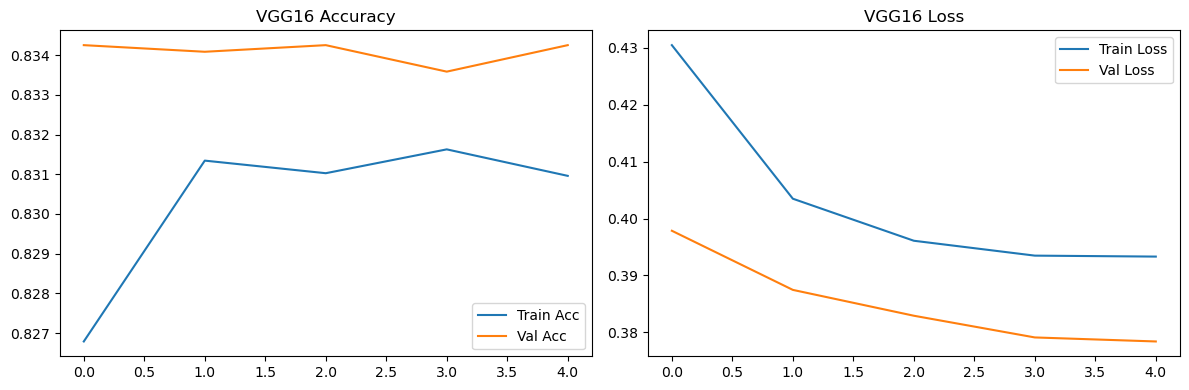

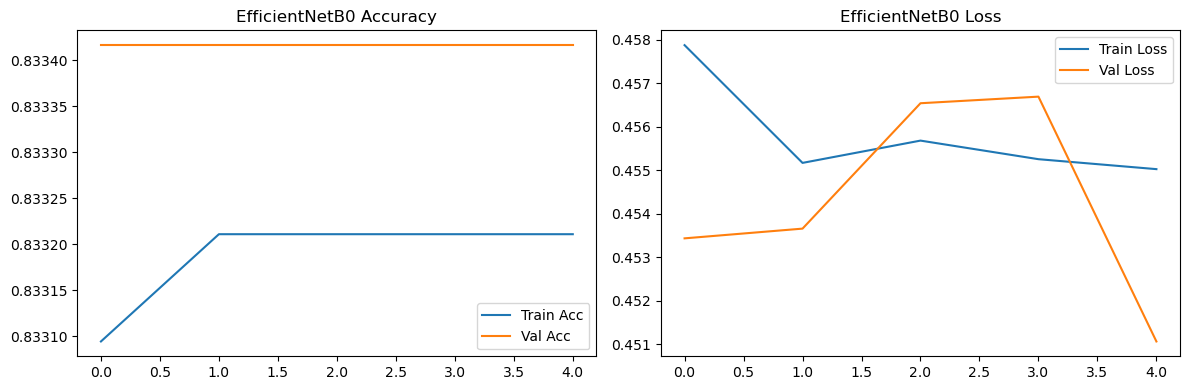

In [8]:
def plot_history(histories):
    for name, history in histories.items():
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Acc')
        plt.plot(history.history['val_accuracy'], label='Val Acc')
        plt.title(f'{name} Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Val Loss')
        plt.title(f'{name} Loss')
        plt.legend()
        plt.tight_layout()
        plt.show()

plot_history(histories)


Evaluating ResNet50...


2090/2090 ━━━━━━━━━━━━━━━━━━━━ 1510s 721ms/step
Accuracy for ResNet50: 0.8654
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     57860
           1       0.00      0.00      0.00      9000

    accuracy                           0.87     66860
   macro avg       0.43      0.50      0.46     66860
weighted avg       0.75      0.87      0.80     66860



D:\anacondapython\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anacondapython\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anacondapython\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


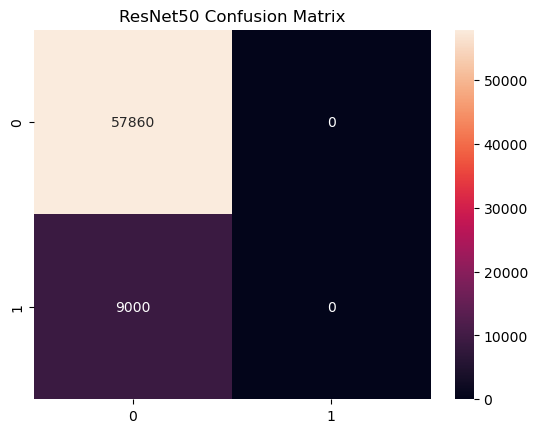

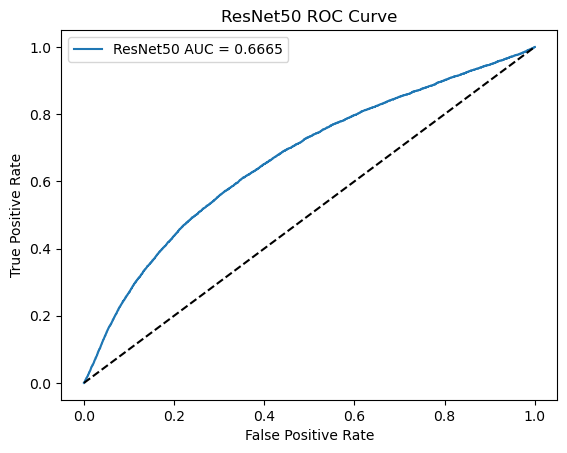


Evaluating VGG16...


2090/2090 ━━━━━━━━━━━━━━━━━━━━ 3557s 2s/step
Accuracy for VGG16: 0.8653
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     57860
           1       0.49      0.01      0.03      9000

    accuracy                           0.87     66860
   macro avg       0.68      0.51      0.48     66860
weighted avg       0.82      0.87      0.81     66860



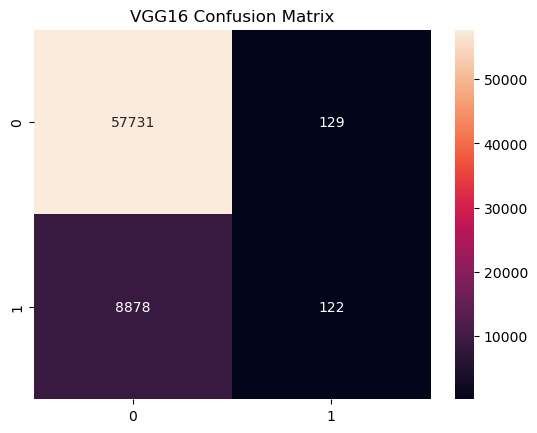

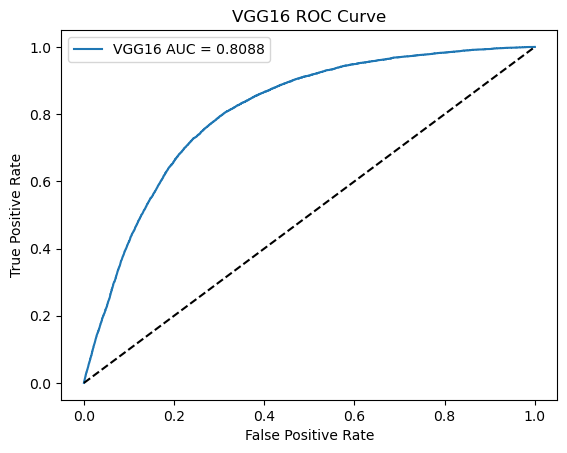


Evaluating EfficientNetB0...


2090/2090 ━━━━━━━━━━━━━━━━━━━━ 753s 359ms/step
Accuracy for EfficientNetB0: 0.8654
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     57860
           1       0.00      0.00      0.00      9000

    accuracy                           0.87     66860
   macro avg       0.43      0.50      0.46     66860
weighted avg       0.75      0.87      0.80     66860



D:\anacondapython\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anacondapython\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anacondapython\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


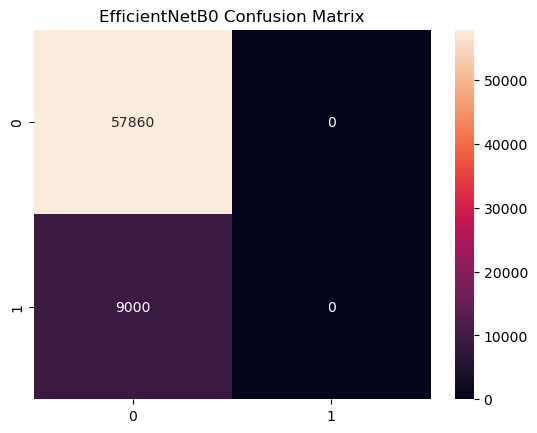

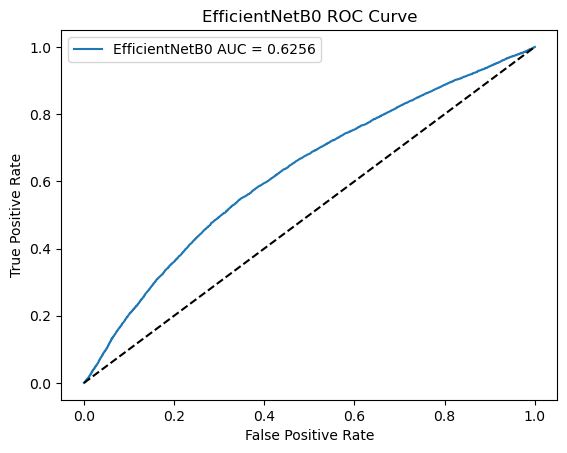

In [9]:
model_preds = []
for name in models.keys():
    print(f"\nEvaluating {name}...")
    model = load_model(f"{name}.h5")
    pred = model.predict(test_data)
    model_preds.append(pred)
    pred_labels = (pred > 0.5).astype(int)
    acc = accuracy_score(test_data.classes, pred_labels)
    print(f"Accuracy for {name}: {acc:.4f}")
    print(classification_report(test_data.classes, pred_labels))
    sns.heatmap(confusion_matrix(test_data.classes, pred_labels), annot=True, fmt='d')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(test_data.classes, pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} AUC = {roc_auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend()
    plt.show()

In [10]:
print("\nStacking Ensemble...")
X_stack = np.hstack(model_preds)
y_stack = test_data.classes

X_train_stack, X_test_stack, y_train_stack, y_test_stack = train_test_split(X_stack, y_stack, test_size=0.2, random_state=42)

stack_model = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])
stack_model.fit(X_train_stack, y_train_stack)


Stacking Ensemble...


Pipeline(steps=[('scaler', StandardScaler()), ('clf', LogisticRegression())])

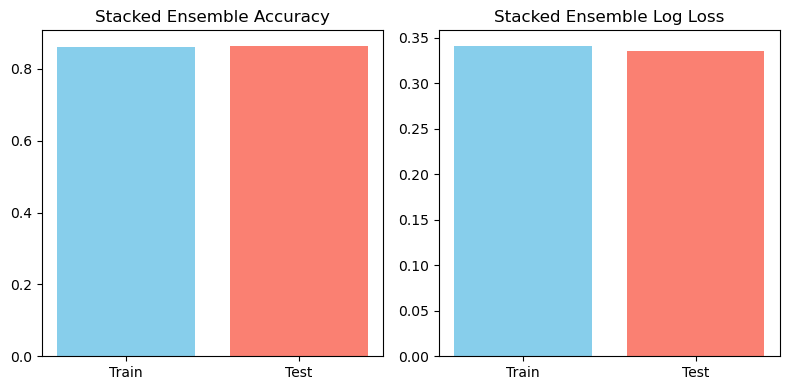


Stacked Ensemble Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     11615
           1       0.43      0.11      0.18      1757

    accuracy                           0.86     13372
   macro avg       0.66      0.54      0.55     13372
weighted avg       0.82      0.86      0.83     13372



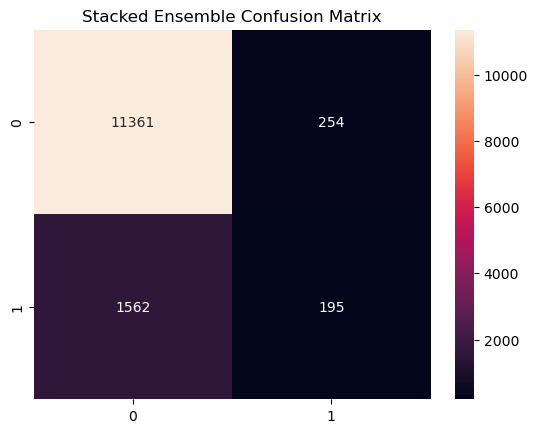

In [12]:
from sklearn.metrics import log_loss
train_pred_proba = stack_model.predict_proba(X_train_stack)[:, 1]
test_pred_proba = stack_model.predict_proba(X_test_stack)[:, 1]
train_loss = log_loss(y_train_stack, train_pred_proba)
test_loss = log_loss(y_test_stack, test_pred_proba)
train_acc = accuracy_score(y_train_stack, stack_model.predict(X_train_stack))
test_acc = accuracy_score(y_test_stack, stack_model.predict(X_test_stack))

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.bar(['Train', 'Test'], [train_acc, test_acc], color=['skyblue', 'salmon'])
plt.title('Stacked Ensemble Accuracy')

plt.subplot(1, 2, 2)
plt.bar(['Train', 'Test'], [train_loss, test_loss], color=['skyblue', 'salmon'])
plt.title('Stacked Ensemble Log Loss')
plt.tight_layout()
plt.show()

y_pred_stack = stack_model.predict(X_test_stack)
print("\nStacked Ensemble Report:")
print(classification_report(y_test_stack, y_pred_stack))
sns.heatmap(confusion_matrix(y_test_stack, y_pred_stack), annot=True, fmt='d')
plt.title("Stacked Ensemble Confusion Matrix")
plt.show()


In [ ]:
# Save stack model
joblib.dump(stack_model, "stack_ensemble.joblib")